In [1]:
from sklearn.datasets import load_wine

data = load_wine()

X = data.data
y = data.target
labels = data.feature_names

print(data.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

results = pd.DataFrame()
for max_depth in range(1,6):
    estimator = DecisionTreeClassifier(criterion = 'entropy', 
                                          max_depth = max_depth, 
                                          random_state = 42)
    estimator.fit(X = X, y = y)
    results = results.append({"max_depth": max_depth, 
                            "accuracy": estimator.score(X = X, y = y)}, 
                           ignore_index=True)
    
results

,accuracy,max_depth
0,0.601124,1.0
1,0.966292,2.0
2,0.994382,3.0
3,1.000000,4.0
4,1.000000,5.0


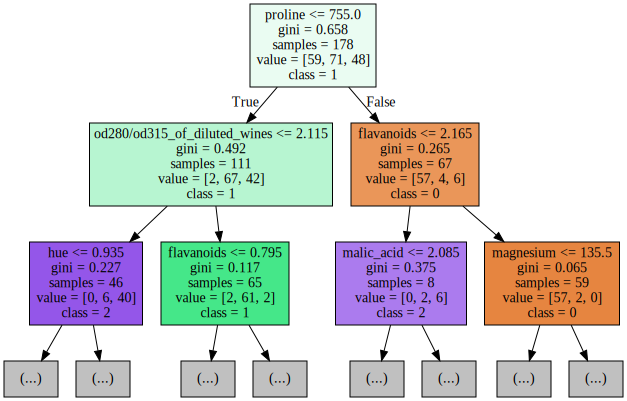

In [3]:
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from sklearn.tree import DecisionTreeClassifier, export_graphviz

estimator = DecisionTreeClassifier()
estimator.fit(X, y)

graph = Source(tree.export_graphviz(estimator, out_file=None
   , feature_names=labels, class_names=['0', '1', '2'] 
   , filled = True, max_depth=2))
display(SVG(graph.pipe(format='svg')))